## 1. Analyzing the Wikipedia voters network

In [8]:
# Read graph data
G1 = snap.LoadEdgeList(snap.PNGraph, 'wiki-Vote.txt', 0, 1)

In [6]:
# The number of nodes in the network
print(f'# of node: {G1.GetNodes()}')

# of node: 7115


In [15]:
# The number of nodes with a self-edge
self_edges = [edge for edge in G1.Edges() if edge.GetSrcNId() == edge.GetDstNId()]
print(f'# of self-edge: {len(self_edges)}')

# 자기 자신에게 투표하는 것은 없다.

# of self-edge: 0


In [17]:
# The number of directed edges in the network
non_self_edges = [edge for edge in G1.Edges() if edge.GetSrcNId() != edge.GetDstNId()]
print(f'# of non-self-edge: {len(non_self_edges)}')

# of non-self-edge: 103689


In [27]:
# The number of undirected edges in the network  (self-loop 포함)
forward_edges = set([(edge.GetSrcNId(), edge.GetDstNId()) for edge in G1.Edges()])
reverse_edges = set([(edge.GetDstNId(), edge.GetSrcNId()) for edge in G1.Edges()])
mutual_votes = forward_edges.intersection(reverse_edges)
print(f'# of undirected edges: {len(mutual_votes)}')

# 두 명이 서로 vote를 해주는 경우

# of undirected edges: 5854


In [34]:
# The number of nodes of zero out-degree (ans: 1005)
all_nodes = set([node.GetId() for node in G1.Nodes()])
source_nodes = set([edge.GetSrcNId() for edge in G1.Edges()])
island_nodes = all_nodes.difference(source_nodes)
print(f'# of nodes of zero out-degree: {len(island_nodes)}')

# 아무한테도 투표하지 않은 사람수


# of nodes of zero out-degree: 1005


In [37]:
## The number of nodes of zero in-degree (ans: 4734)

all_nodes = set([node.GetId() for node in G1.Nodes()])
dst_nodes = set([edge.GetDstNId() for edge in G1.Edges()])
no_vote_nodes = all_nodes.difference(dst_nodes)
print(f'# of nodes of zero in-degree: {len(no_vote_nodes)}')

# 아무한테도 표를 받지 못한 사람수

# of nodes of zero in-degree: 4734


In [41]:
## The number of nodes with more than 10 outgoing edges
degOutCntV = snap.TIntPrV()
snap.GetOutDegCnt(G1, degOutCntV)
more_than_10_votees = [cnt.GetVal2() for cnt in degOutCntV if cnt.GetVal1() >= 10]

print(f'# of nodes of nodes with more than 10 outgoing edges: {sum(more_than_10_votees)}')

# 10표 이상을 행사한 사람수


# of nodes of nodes with more than 10 outgoing edges: 1691


In [42]:
## The number of nodes with fewer than 10 incoming edges 
degInCntV = snap.TIntPrV()
snap.GetInDegCnt(G1, degInCntV)
more_than_10_voters = [cnt.GetVal2() for cnt in degInCntV if cnt.GetVal1() >= 10]

print(f'# of nodes of nodes with more than 10 incoming edges: {sum(more_than_10_voters)}')

# 10표 이상을 받은 사람수

# of nodes of nodes with more than 10 incoming edges: 1950


### Plot the distribution of out-degrees of nodes in the network on a log-log scale

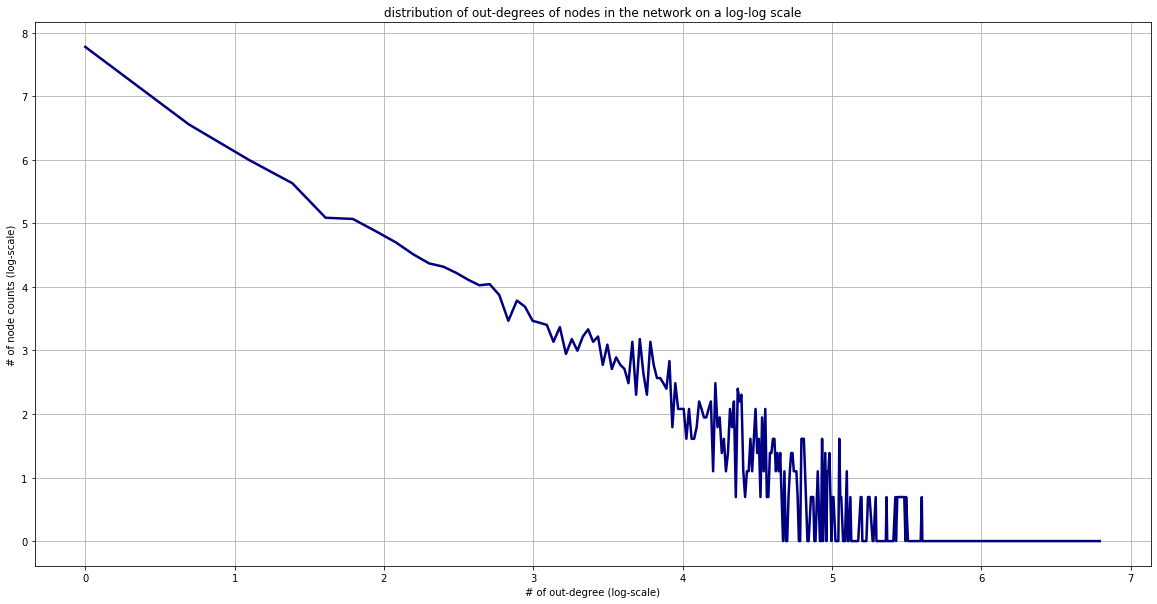

In [58]:
import numpy as np
import matplotlib.pyplot as plt

degOutCntV = snap.TIntPrV()
snap.GetOutDegCnt(G1, degOutCntV)
x = [cnt.GetVal1() for cnt in degOutCntV if cnt.GetVal1() >= 1]
y = [cnt.GetVal2() for cnt in degOutCntV if cnt.GetVal1() >= 1]
xlog = np.log(x)
ylog = np.log(y)

f, ax = plt.subplots(figsize=(20,10))
plt.plot(xlog, ylog, linewidth=2.5, color='navy')
plt.xlabel(r'# of out-degree (log-scale)')
plt.ylabel(r'# of node counts (log-scale)')
ax.grid(True)
plt.title(r'distribution of out-degrees of nodes in the network on a log-log scale')
plt.show()

### Compute and plot the least-square regression line for the out-degreedistribution